In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('Datasets/Social_Network_Ads.csv',usecols=['Age','EstimatedSalary','Purchased'])
df.sample(5)

,Age,EstimatedSalary,Purchased
149,20,74000,0
174,34,72000,0
212,59,42000,0
313,49,141000,1
356,54,70000,1


## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(['Purchased'],axis=1),df['Purchased'],test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

## Standard Scalar

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [15]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [17]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


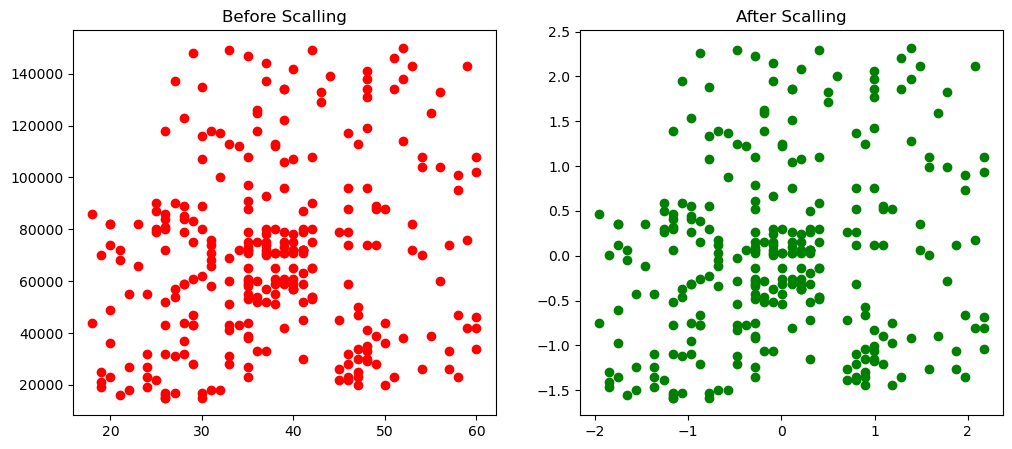

In [21]:
fig, (ax1,ax2) =plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x=X_train['Age'],y=X_train['EstimatedSalary'],color='r')
ax1.set_title('Before Scalling')
ax2.scatter(x=X_train_scaled['Age'],y=X_train_scaled['EstimatedSalary'],color='g')
ax2.set_title('After Scalling')
plt.show()

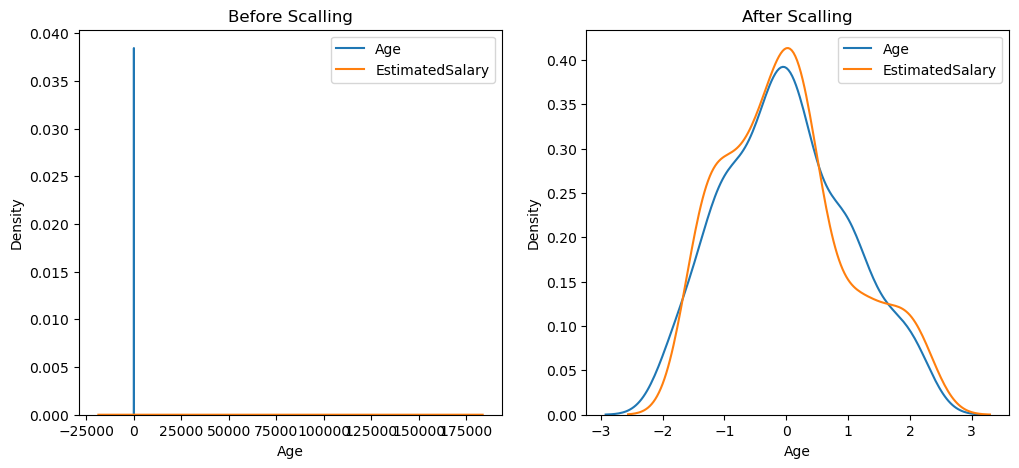

In [28]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Before Scalling')
sns.kdeplot(X_train['Age'],ax=ax1,label='Age')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1,label='EstimatedSalary')
ax2.set_title('After Scalling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2,label='Age')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2,label='EstimatedSalary')
ax1.legend()
ax2.legend()
plt.show()

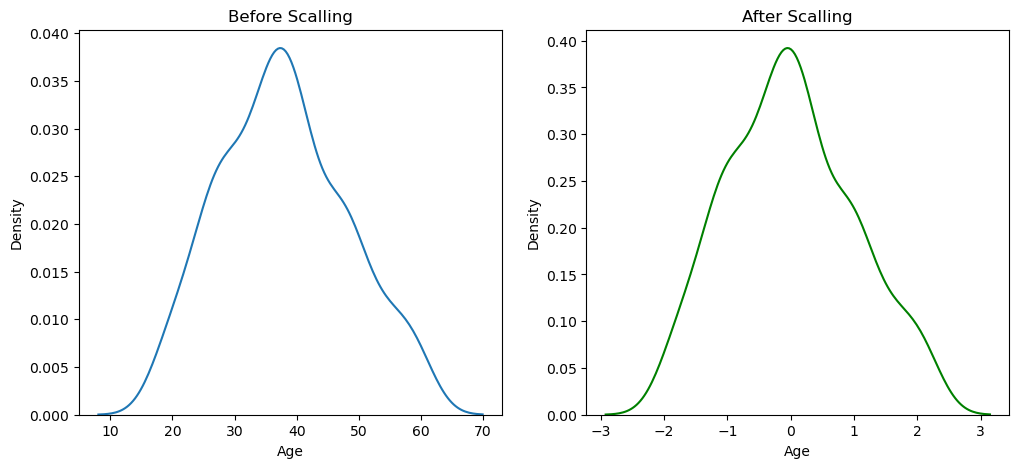

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title('Before Scalling')
sns.kdeplot(X_train['Age'],ax=ax1)

ax2.set_title('After Scalling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2,color='g')
plt.show()

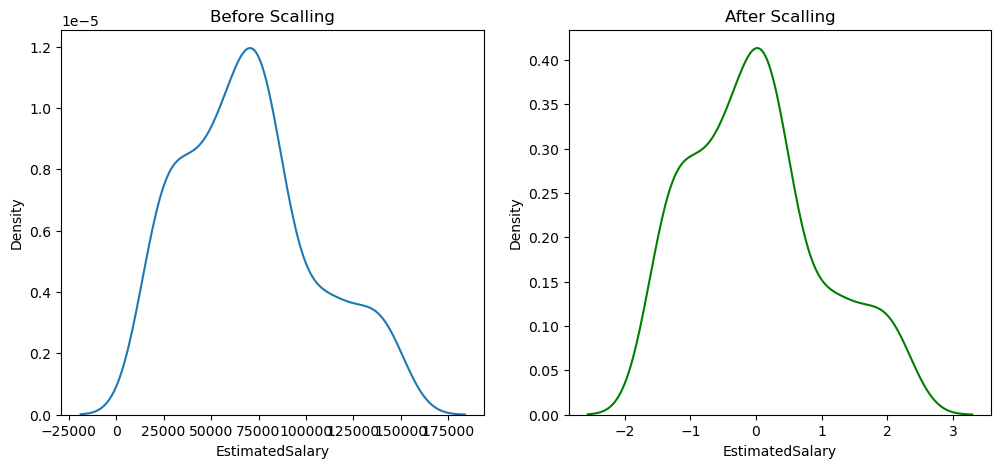

In [34]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Before Scalling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax2.set_title('After Scalling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2,color='g')
plt.show()

## Why scalling is most important

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [38]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [39]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test,y_pred)

0.6583333333333333

In [42]:
accuracy_score(y_test,y_pred_scaled)

0.8666666666666667

## Where Scaling does not matter

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
clf = DecisionTreeClassifier()
clf_scaled = DecisionTreeClassifier()

In [46]:
clf.fit(X_train,y_train)
clf_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [48]:
y_p = clf.predict(X_test)
y_p_s = clf_scaled.predict(X_test_scaled)

In [50]:
accuracy_score(y_test,y_p)


0.875

In [51]:
accuracy_score(y_test,y_p_s)

0.875

In [52]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [54]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

C:\Users\Musadaq Tanvir\AppData\Local\Temp\ipykernel_2072\2365817244.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


In [55]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


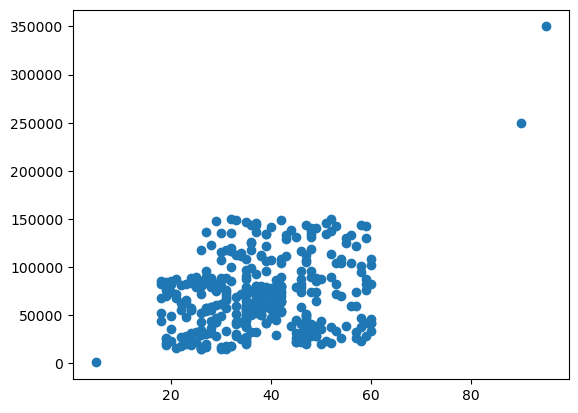

In [56]:
plt.scatter(df['Age'],df['EstimatedSalary'])
plt.show()

In [ ]:
# Do further analysis as done before 